# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*) 

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded. 


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1 
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [2]:
df = pd.read_csv('tmdb_5000_movies TMDL 2024.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

budget, overview, release_date, runtime and tagline. By subtracting non-null count from the rows in the column (4803)

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [7]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [9]:
df = df.dropna(subset=['overview'])
df = df.reset_index(drop=True)

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [10]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    index = unique_labels.index(label)
    out[index] = 1
    return out

# save genres
processed_genres = [process_genre_string(gs) for gs in df['genres']]

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = [encode_labels(genre, unique_genres) for genre in tqdm(df["proc_genres"], total=df.shape[0])]

df["one_hot_genres"] = encoded_labels

100%|███████████████████████████████████| 4800/4800 [00:00<00:00, 596717.72it/s]


Verify that one-hot encodings are indeed as expected

In [11]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

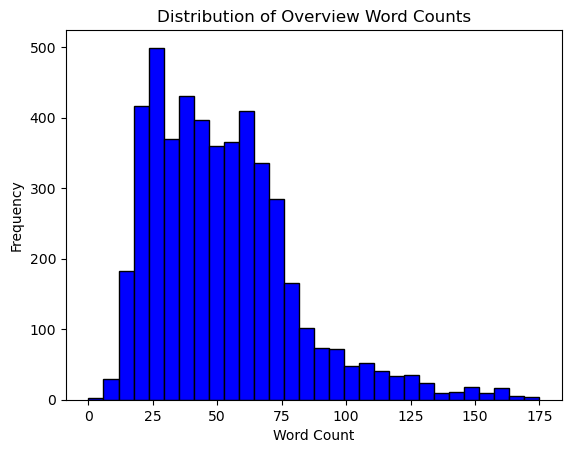

In [18]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

# loop over df, remove punctuation, make words lowercase and add it to a new column
processed_overviews = [remove_punctuation(str(ov)).lower() for ov in df['overview']]
df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list 
overview_lens = [len(ov.split()) for ov in processed_overviews]

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
min_len = min(overview_lens)
max_len = max(overview_lens)
plt.hist(overview_lens, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Overview Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

 The shortest overview seems to have one word. The longest overview seems to have just under 175 words. Given that the word count of overviews is skewed to the right I would truncate the overviews with word counts greater than 85 as this would allow us to retain a majority of the information while minimizing the information dropped as we are only dropping the tail of the distribution which don't account for most overviews.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [19]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= token_len]

# split each proc_overview into a list of words, select the first token_len words, 
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda ov: ' '.join(ov.split()[:token_len]))

# print to verify
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [20]:
# hint: store all words for all movies in a set, change it to a list and sort

all_words = [word for overview in df['proc_overview'] for word in overview.split()]
unique_words = list(set(all_words))
sorted_unique_words = sorted(unique_words)
vocab_len = len(sorted_unique_words)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [24]:
encoded_labels = []

for index, row in tqdm(df.iterrows(), total=len(df)):
    words = row["proc_overview"].split()
    sentence_encode = np.zeros(vocab_len) # set of encodings for this overview
    for word in words:
        if word in unique_words:
            word_index = unique_words.index(word) 
            sentence_encode[word_index] += 1   # get encoding for this word
    encoded_labels.append(sentence_encode)
    
df["one_hot_overview"] = encoded_labels

print(df[['proc_overview', 'one_hot_overview']])

vector_length = vocab_len
print(vector_length)

100%|██████████████████████████████████████| 4707/4707 [00:09<00:00, 507.88it/s]

                                          proc_overview  \
0     in the 22nd century a paraplegic marine is dis...   
1     captain barbossa long believed to be dead has ...   
2     a cryptic message from bonds past sends him on...   
3     following the death of district attorney harve...   
4     john carter is a warweary former military capt...   
...                                                 ...   
4794  adam a security guard travels from california ...   
4795  el mariachi just wants to play his guitar and ...   
4797  signed sealed delivered introduces a dedicated...   
4798  when ambitious new york attorney sam is sent t...   
4799  ever since the second grade when he first saw ...   

                                       one_hot_overview  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

16x4707x12493=940872816

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

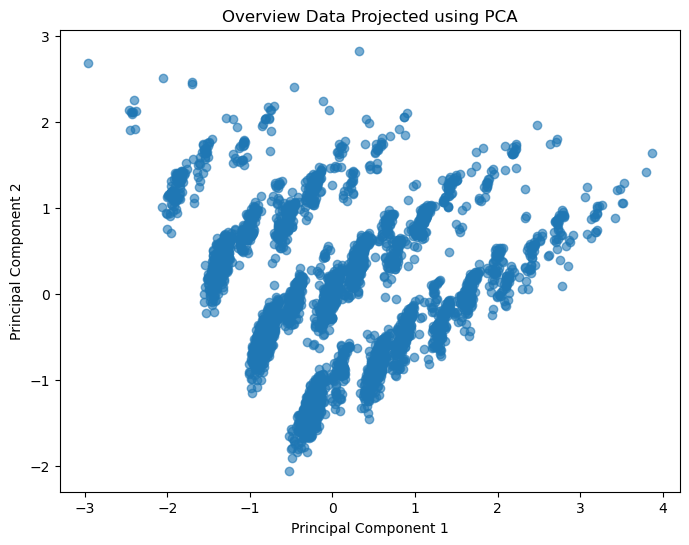

<module 'matplotlib.pyplot' from '/Users/Nicholas/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>


In [45]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

X = np.stack(df['one_hot_overview'].values)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title('Overview Data Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(plt)

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

There seem to be multiple positive linear patterns in the scatterplot. As PC1 increases PC2 also tends to increase in a predictable pattern.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

0.8871154913247687

In [52]:


# Explained variance ratio for the first two components
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance by the first two components
total_explained_variance = sum(explained_variance)

# To quantify the loss, fit PCA without specifying n_components to use all components
pca_full = PCA()
pca_full.fit(X)

# Total variance explained by all components (should be 1.0 for the full PCA)
total_variance = sum(pca_full.explained_variance_ratio_)

# Calculate the variance information loss for the 2D projection
variance_information_loss = 1 - total_explained_variance

print(variance_information_loss)

0.8871154913247687


**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

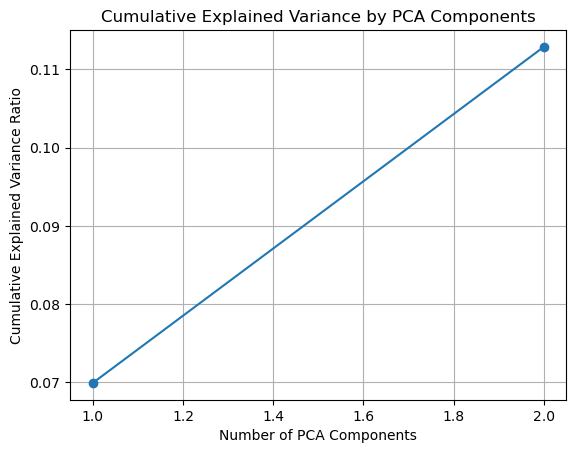

In [61]:

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = range(1, len(explained_variance) + 1)

plt.plot(n_components, cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)


**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [62]:
print("Max cumulative explained variance:", cumulative_explained_variance.max())
indices = np.where(cumulative_explained_variance >= 0.8)[0]
if len(indices) > 0:
    components_needed = indices[0] + 1  # Adjusting for 0-based indexing
    print(f"Number of principal components needed: {components_needed}")
else:
    print("The cumulative explained variance never reaches 0.8")


Max cumulative explained variance: 0.1128845086752312
The cumulative explained variance never reaches 0.8


Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called overview_pca in the dataframe.nswer here*

In [63]:
n_dims = 2
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(X)
df["overview_pca"] = list(labels_pca)

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [65]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20, random_state=42)
# fit model
y_preds = kmeans.fit_predict(labels_pca) 
# get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
print(df[df["cluster_kmeans"] == 0])

/Users/Nicholas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                         title  \
4                  John Carter   
6                      Tangled   
23          The Golden Compass   
25                     Titanic   
31                  Iron Man 3   
...                        ...   
4704  When the Lights Went Out   
4747               The Dirties   
4776                   Slacker   
4781           The Puffy Chair   
4794                    Cavite   

                                               overview  \
4     John Carter is a war-weary, former military ca...   
6     When the kingdom's most wanted-and most charmi...   
23    After overhearing a shocking secret, precociou...   
25    84 years later, a 101-year-old woman named Ros...   
31    When Tony Stark's world is torn apart by a for...   
...                                                 ...   
4704  Yorkshire, 1974, the Maynard family moves into...   
4747  Two best friends are filming a comedy about ge...   
4776  Presents a day in the life in Austin, Texas am...   
4

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

I'm not sure? It seems that there a few repeating genres in the cluster (Adventure, Drama, Thriller) so possibly the movies go well with eachother

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

/Users/Nicholas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Nicholas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Nicholas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Nicholas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

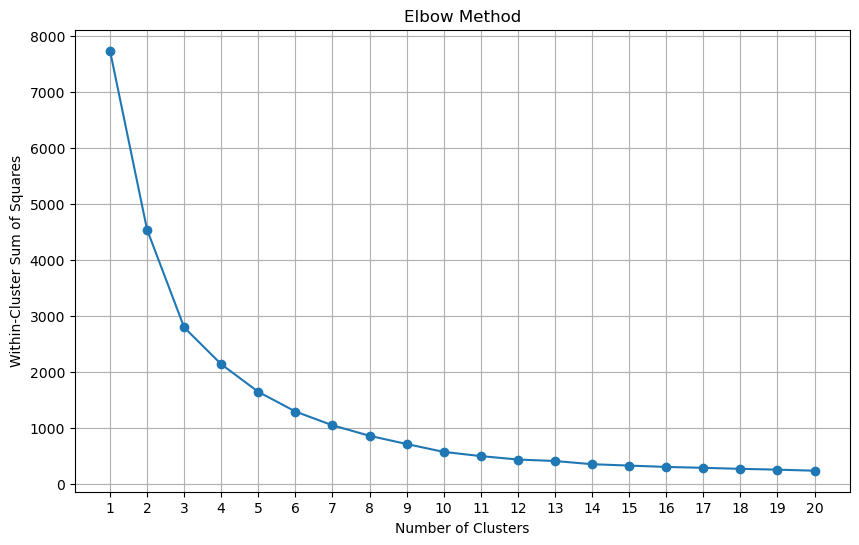

In [68]:
X_pca = pca.fit_transform(X)
wcss = [] 
k_values = range(1, 21)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')
plt.xticks(k_values) 
plt.grid(True)
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [70]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=20, random_state=42)  # Using 20 clusters, random_state for reproducibility
gmm.fit(X_pca)
cluster_gmm = gmm.predict(X_pca)
df["cluster_gmm"] = cluster_gmm
selected_cluster = 0
cluster_movies = df[df["cluster_gmm"] == selected_cluster]

print(f"Movies in cluster {selected_cluster}:")
print(cluster_movies[['title', 'overview']])

Movies in cluster 0:
                                                title  \
7                             Avengers: Age of Ultron   
17        Pirates of the Caribbean: On Stranger Tides   
86                                Shrek Forever After   
135                                       The Wolfman   
171   Master and Commander: The Far Side of the World   
...                                               ...   
4727                                    Cheap Thrills   
4750                                          Hayride   
4758                                     A True Story   
4777                                      Dutch Kills   
4786                                            Clean   

                                               overview  
7     When Tony Stark tries to jumpstart a dormant p...  
17    Captain Jack Sparrow crosses paths with a woma...  
86    A bored and domesticated Shrek pacts with deal...  
135   Lawrence Talbot, an American man on a visit to...  
171 

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

I do not know most of the movies mentioned in the output so I find it hard to determine whether the clustering went alright. Does Avengers and Shrek go well together I don't think so? I can't find any parallels to the k-means clustering output

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

In [ ]:
# Create an array for the x-axis positions
# Plotting the bars
# Add labels, title, and legend

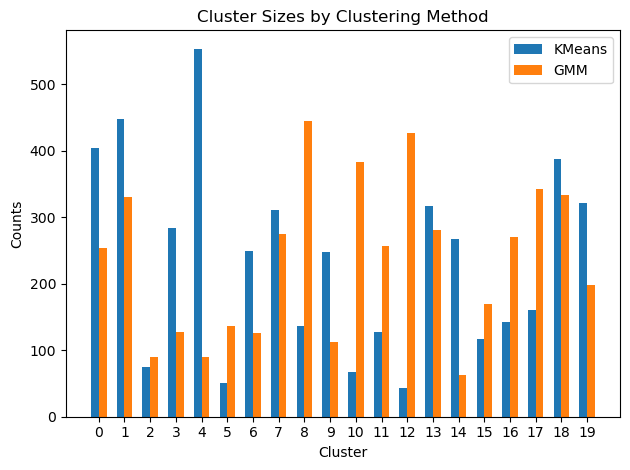

In [74]:
kmeans_counts = df['cluster_kmeans'].value_counts().sort_index()
gmm_counts = df['cluster_gmm'].value_counts().sort_index()
all_indices = sorted(set(kmeans_counts.index).union(set(gmm_counts.index)))
ind = np.arange(len(all_indices))
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, kmeans_counts, width, label='KMeans')
rects2 = ax.bar(ind + width/2, gmm_counts, width, label='GMM')

ax.set_xlabel('Cluster')
ax.set_ylabel('Counts')
ax.set_title('Cluster Sizes by Clustering Method')
ax.set_xticks(ind)
ax.set_xticklabels(all_indices)
ax.legend()

plt.tight_layout()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

The counts of either clustering method over the x-axis seem to be quite volatile. I can't find an obvious pattern, I'm not sure why this is.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [77]:
prev_watch = "Avatar"

cluster_kmeans = df.loc[df['title'] == prev_watch, 'cluster_kmeans'].iloc[0]
cluster_gmm = df.loc[df['title'] == prev_watch, 'cluster_gmm'].iloc[0]

kmeans_recommend = df[df['cluster_kmeans'] == cluster_kmeans]['title']
gmm_recommend = df[df['cluster_gmm'] == cluster_gmm]['title']

kmeans_recommend = kmeans_recommend[kmeans_recommend != prev_watch]
gmm_recommend = gmm_recommend[gmm_recommend != prev_watch]

# print out similar movies
print("Recommendations based on K-means clustering:")
print(kmeans_recommend.to_string(index=False))
print("\nRecommendations based on GMM clustering:")
print(gmm_recommend.to_string(index=False))

Recommendations based on K-means clustering:
                                The Jungle Book
                                Angels & Demons
                                   The Revenant
                                       R.I.P.D.
                                     Prometheus
                               Django Unchained
                                    Cloud Atlas
                              The Fifth Element
                                    Seventh Son
                                    Tower Heist
                            Memoirs of a Geisha
                                 Shutter Island
                                         Robots
                                      The Siege
                         The Tale of Despereaux
                                            Joy
                            Intolerable Cruelty
                                       Inkheart
                                   Leatherheads
                       The Pursuit of Happy

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

I personally like some of the movies the two recommender systems present. I find that Jungle book is good recommendation by both recommender systems given that Avatar was the movie on which the recommendation was based. I could possibly see recommending jungle book in this context.

**Q6.3** How would you try making the recommender systems better?

Maybe you could include feedback into the recommender system so that it would update clusters every time a user views a recommendation as fitting.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

I don't understand this question

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [83]:
from numpy.linalg import norm

def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (norm(v1) * norm(v2))

prev_watch = "Avatar"
df['overview_pca'] = df['overview_pca'].apply(np.array)
prev_watch_enc = df.loc[df['title'] == prev_watch, 'overview_pca'].iloc[0]

sims = [] 
for i, row in df.iterrows():
    sim = cosine_sim(prev_watch_enc, row['overview_pca'])
    sims.append(sim)

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by="cos_sim_to_avatar", ascending=False)

recommendations = df[df['title'] != prev_watch][['title', 'cos_sim_to_avatar']]
print("Top recommendations based on 'Avatar':")
print(recommendations.head())


Top recommendations based on 'Avatar':
                       title  cos_sim_to_avatar
2157             Daybreakers           0.999983
2837  The Fault in Our Stars           0.999982
61         Jupiter Ascending           0.999974
3127  Fifty Dead Men Walking           0.999963
4685      The Man from Earth           0.999958


I don't know any of the movies and searching up the top three I wouldn't see myself recommending them to someone who just saw avatar. I found the recommendations based on the clustering methods better.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [ ]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import perf_counter

def train_and_eval(model, train_X, train_y, test_X, test_y):
    """Trains, times, and evaluates a given model on data"""
    
    start = perf_counter()
    model = model.fit(train_X, train_y)
    end = perf_counter()
    fit_time = end - start

    start = perf_counter()
    train_score = model.score(train_X, train_y)
    end = perf_counter()
    train_score_time = end - start

    start = perf_counter()
    test_score = model.score(test_X, test_y)
    end = perf_counter()
    test_score_time = end - start

    return train_score, test_score, fit_time, train_score_time, test_score_time

#Getting the first 10 words of each movie overview
df['first_10_words'] = df['overview'].apply(lambda x: ' '.join(x.split()[:10]))
X = df['first_10_words']
y = df['proc_genres']

#Convert the text documents to a matrix of token counts
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

#Initializes and trains/evaluates the model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(clf, X_train, y_train, X_test, y_test)

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")
print(f"Mean Training Time: {fit_time} seconds")
print(f"Mean Inference Time (Training Set): {train_score_time} seconds")
print(f"Mean Inference Time (Testing Set): {test_score_time / X_test.shape[0]} seconds")


Train Accuracy: 0.24648074369189907
Test Accuracy: 0.23885350318471338
Mean Training Time: 0.03779783402569592 seconds
Mean Inference Time (Training Set): 0.0043998749461025 seconds
Mean Inference Time (Testing Set): 1.3197091756084036e-06 seconds


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

I chose a decision tree classifier model because its suitable for categorical data and can work with binary classification tasks like genre prediction. After adding the ‘train_and_eval’ function accurate measures of the time could be obtained such that it is possible to analyze the models performance in terms of computational efficiency. The max_depth parameter was initially set to 5 to prevent overfitting while ensuring that the model is complex enough to learn patterns from the data. I updated the timing method as I don’t just want to make sure it's really accurate. I also want to make sure it doesn't use too much computing power. This kind of balance is important for actual projects where you need your model to work well and be able to handle lots of data or users at the same time. If I had more time I would add more ways to check how good the model is. This could be measures such as precision, recall and F1 score as it would give us a better idea of how well the model is predicting especially when the data isn’t spread out evenly.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)